In [63]:
# Load relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import warnings

warnings.filterwarnings("ignore")  # Suppress all warnings

# Extracting and cleaning data

In [64]:
country = pd.read_csv("FFG_Hackathon_Country_Level_Data.csv")
country.head()

,Year,Country Name,Country Code,AG.LND.AGRI.K2,AG.LND.TOTL.K2,AG.SRF.TOTL.K2,EG.ELC.COAL.ZS,EG.ELC.FOSL.ZS,EG.ELC.HYRO.ZS,EG.ELC.NGAS.ZS,...,EN.ATM.CO2E.SF.ZS,EN.CO2.BLDG.ZS,EN.CO2.ETOT.ZS,EN.CO2.MANF.ZS,EN.CO2.OTHX.ZS,EN.CO2.TRAN.ZS,EN.POP.DNST,NY.GDP.TOTL.RT.ZS,SP.RUR.TOTL,SP.URB.TOTL
0,2007,Albania,ALB,11190.00,27400.0,28750.0,0.000000,2.517483,97.482517,0.000000,...,1.867414,7.407407,8.730159,16.931217,11.640212,55.555556,108.394781,1.761086,1517619.0,1452398.0
1,2007,Algeria,DZA,412520.00,2381740.0,2381740.0,0.000000,99.392408,0.607592,97.257770,...,2.755153,16.028285,40.011785,11.455510,0.000000,32.516205,14.345383,32.464934,11839539.0,22327433.0
2,2007,Angola,AGO,508468.17,1246700.0,1246700.0,0.000000,22.381100,77.618900,0.000000,...,0.000000,23.858921,12.344398,23.547718,0.311203,40.041494,16.768559,46.279012,8879762.0,12025601.0
3,2007,Argentina,ARG,1440330.00,2736690.0,2780400.0,2.179398,63.438998,28.270726,51.046874,...,2.091227,14.616174,33.816513,20.510962,5.405569,25.644742,14.500837,4.995813,3823185.0,35861110.0
4,2007,Armenia,ARM,17519.00,28470.0,29740.0,0.000000,25.245846,31.417430,25.245846,...,0.145033,22.291667,22.500000,24.375000,8.750000,22.083333,103.007306,0.009296,1063397.0,1869221.0


In [65]:
region = pd.read_csv('FFG_Hackathon_Region_Level_Data.csv')
region.head()

,Year,Region Name,Region Code,AG.LND.AGRI.K2,AG.LND.TOTL.K2,AG.SRF.TOTL.K2,EG.ELC.COAL.ZS,EG.ELC.FOSL.ZS,EG.ELC.HYRO.ZS,EG.ELC.NGAS.ZS,...,EN.ATM.CO2E.SF.ZS,EN.CO2.BLDG.ZS,EN.CO2.ETOT.ZS,EN.CO2.MANF.ZS,EN.CO2.OTHX.ZS,EN.CO2.TRAN.ZS,EN.POP.DNST,NY.GDP.TOTL.RT.ZS,SP.RUR.TOTL,SP.URB.TOTL
0,2007,Arab World,ARB,4.100190e+06,11235331.0,11291048.90,1.762740,89.984788,3.963724,61.248601,...,1.620960,5.650951,46.898082,20.719009,1.564072,25.168746,29.397506,33.493019,148138437,182152279
1,2007,Central Europe and the Baltics,CEB,5.335050e+05,1103146.0,1134949.00,56.834086,68.004595,8.193398,9.389400,...,54.898725,12.008253,54.620856,14.253523,2.264274,16.850379,95.525658,1.040325,40210586,65168162
2,2007,Early-demographic dividend,EAR,1.358708e+07,33238064.3,34138970.28,32.421922,77.757311,17.324979,32.495198,...,31.617409,10.535275,46.186588,19.464848,3.102839,20.709016,83.546457,11.420924,1642568366,1134354137
3,2007,East Asia & Pacific,EAS,1.186039e+07,24423314.2,24861936.20,60.577680,77.822184,11.254810,12.818944,...,62.028463,6.692401,51.070526,28.415529,2.080749,11.740694,88.513195,3.139450,1105876303,1055909270
4,2007,East Asia & Pacific (IDA & IBRD countries),TEA,7.659722e+06,15830280.0,16187472.00,73.755915,82.808673,14.320835,6.924162,...,68.219112,6.129646,50.190863,31.844113,2.335515,9.499457,120.010545,6.815940,1061903356,837897174


###### Melt Dataframes for easy access

In [66]:
ids = ['Year','Country Name','Country Code']
country = pd.melt(country,id_vars=ids,var_name= 'Indicator',value_name='value')
country.head()

,Year,Country Name,Country Code,Indicator,value
0,2007,Albania,ALB,AG.LND.AGRI.K2,11190.00
1,2007,Algeria,DZA,AG.LND.AGRI.K2,412520.00
2,2007,Angola,AGO,AG.LND.AGRI.K2,508468.17
3,2007,Argentina,ARG,AG.LND.AGRI.K2,1440330.00
4,2007,Armenia,ARM,AG.LND.AGRI.K2,17519.00


In [67]:
ids = ['Year','Region Name','Region Code']
region = pd.melt(region,id_vars=ids,var_name='Indicator',value_name='value')
region.head()

,Year,Region Name,Region Code,Indicator,value
0,2007,Arab World,ARB,AG.LND.AGRI.K2,4.100190e+06
1,2007,Central Europe and the Baltics,CEB,AG.LND.AGRI.K2,5.335050e+05
2,2007,Early-demographic dividend,EAR,AG.LND.AGRI.K2,1.358708e+07
3,2007,East Asia & Pacific,EAS,AG.LND.AGRI.K2,1.186039e+07
4,2007,East Asia & Pacific (IDA & IBRD countries),TEA,AG.LND.AGRI.K2,7.659722e+06


##### Extract Indicators that have CO2 in them

In [68]:
country = country[country['Indicator'].str.contains('CO2')]
country.head()

,Year,Country Name,Country Code,Indicator,value
22270,2007,Albania,ALB,EN.ATM.CO2E.GF.KT,33.003
22271,2007,Algeria,DZA,EN.ATM.CO2E.GF.KT,51117.980
22272,2007,Angola,AGO,EN.ATM.CO2E.GF.KT,1595.145
22273,2007,Argentina,ARG,EN.ATM.CO2E.GF.KT,87248.931
22274,2007,Armenia,ARM,EN.ATM.CO2E.GF.KT,3762.342


In [69]:
region = region[region['Indicator'].str.contains('CO2')]
region.head()

,Year,Region Name,Region Code,Indicator,value
6460,2007,Arab World,ARB,EN.ATM.CO2E.GF.KT,5.159960e+05
6461,2007,Central Europe and the Baltics,CEB,EN.ATM.CO2E.GF.KT,1.373512e+05
6462,2007,Early-demographic dividend,EAR,EN.ATM.CO2E.GF.KT,1.289864e+06
6463,2007,East Asia & Pacific,EAS,EN.ATM.CO2E.GF.KT,7.227350e+05
6464,2007,East Asia & Pacific (IDA & IBRD countries),TEA,EN.ATM.CO2E.GF.KT,3.432057e+05


###### check if entries have no indicator value and drop them

In [71]:
country['value'].isnull().values.any()

True

In [72]:
country = country.dropna(subset=['value'])


In [73]:
country['value'].isnull().values.any()

False

In [74]:
region['value'].isnull().values.any()

True

In [75]:
region = region.dropna(subset=['value'])



In [76]:
region['value'].isnull().values.any()


False

In [77]:
df2=region.groupby(['Region Name','Year'])['value'].sum().reset_index()
df2.head(20)

,Region Name,Year,value
0,Arab World,2007,2.596778e+06
1,Arab World,2008,2.854631e+06
2,Arab World,2009,3.023057e+06
3,Arab World,2010,3.151839e+06
4,Arab World,2011,3.195442e+06
5,Arab World,2012,3.534515e+06
6,Arab World,2013,3.495750e+06
7,Arab World,2014,3.700196e+06
8,Arab World,2015,3.738973e+06
9,Arab World,2016,3.644374e+06


In [93]:
df3=country.groupby(['Country Name','Year'])['value'].sum().reset_index()

#df3['Indicator Value']= df3['value']
df3

,Country Name,Year,value
0,Albania,2007,7605.238179
1,Albania,2008,8482.273914
2,Albania,2009,8392.097613
3,Albania,2010,8735.404560
4,Albania,2011,9766.465013
...,...,...,...
1301,Zimbabwe,2012,15200.609475
1302,Zimbabwe,2013,23147.963440
1303,Zimbabwe,2014,23778.265904
1304,Zimbabwe,2015,24081.801955


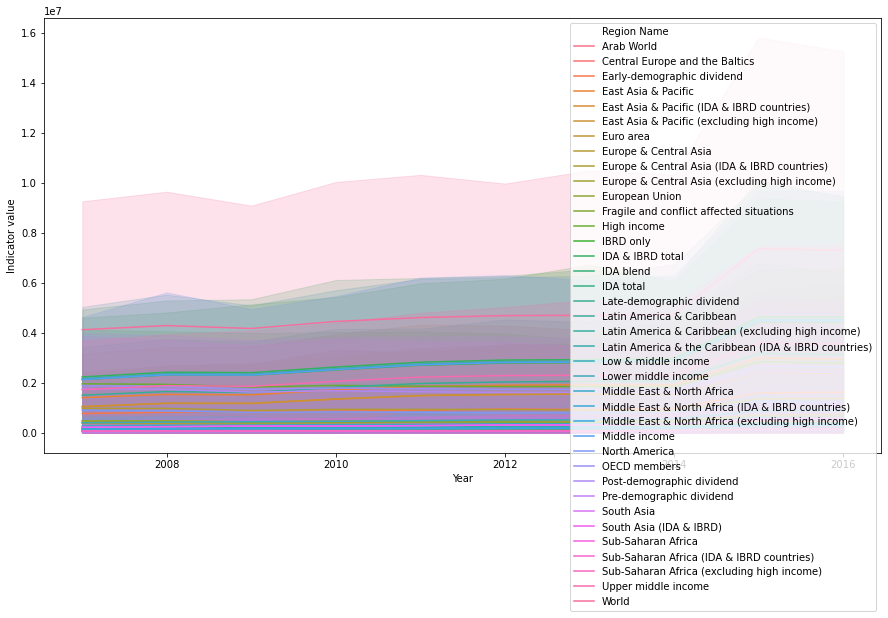

In [45]:

plt.figure(figsize=(15,8))
ax= sns.lineplot(x=region['Year'],y=region['Indicator value'],hue=region['Region Name'])

# filter for those who had large emissions in 2007 and how are they doing now

In [94]:
df3['Year']

0       2007
1       2008
2       2009
3       2010
4       2011
        ... 
1301    2012
1302    2013
1303    2014
1304    2015
1305    2016
Name: Year, Length: 1306, dtype: int64

In [101]:
df3_2007 = df3[df3['Year']==2007]
df3_2007.nlargest(10,'value')

,Country Name,Year,value
230,China,2007,1.271667e+07
1226,United States,2007,1.152225e+07
996,Russian Federation,2007,3.273641e+06
538,India,2007,2.728209e+06
606,Japan,2007,2.469561e+06
448,Germany,2007,1.546028e+06
210,Canada,2007,1.132780e+06
1216,United Kingdom,2007,1.047825e+06
646,"Korea, Rep.",2007,9.655357e+05
746,Mexico,2007,9.308500e+05


# who hav

In [100]:
df3_2016 = df3[df3['Year']==2016]
df3_2016.nlargest(10,'value')

,Country Name,Year,value
239,China,2016,1.858428e+07
1235,United States,2016,9.955451e+06
547,India,2016,4.669159e+06
1005,Russian Federation,2016,3.415568e+06
615,Japan,2016,2.245319e+06
457,Germany,2016,1.440079e+06
655,"Korea, Rep.",2016,1.213284e+06
1015,Saudi Arabia,2016,1.099028e+06
219,Canada,2016,1.080438e+06
557,Indonesia,2016,1.080334e+06


From this we can see that mexico and united kingdom are doing better and have worked on their emissions